# Ejemplo sencillo PCA.
Gran parte de todos los análisis de este curso van a realizarse con la librería de machine learning . Consultar <a href="https://scikit-learn.org/stable/user_guide.html"> la guia de usuario </a> y <a href="https://scikit-learn.org/stable/modules/classes.html"> la documentación de la API </a> para toda la información

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

# PCA manual. calculando los valores propios de la matriz de covarianza.
Para ello se utilizan simplemente funciones de numpy



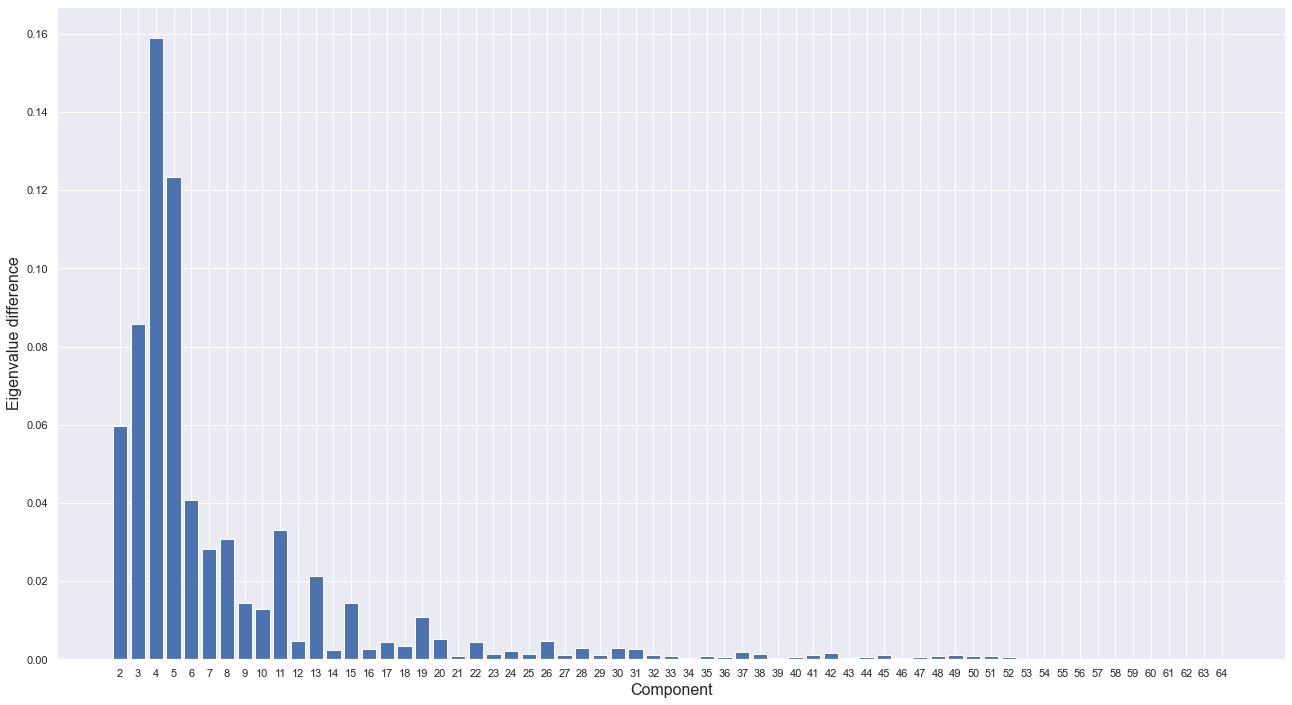

In [ ]:
np.random.seed(1000)
    
# Cargamos la base de datos
digits = load_digits()
X = digits['data'] / np.max(digits['data'])

# Computamos los valores propios de la matriz de covarianza
C = np.cov(X.T)
l, v = np.linalg.eig(C)
l = np.sort(l)[::-1]
d = l[:l.shape[0] - 1] - l[1:]

# Vemos las diferencias
sns.set()

fig, ax = plt.subplots(figsize=(22, 12))

ax.bar(np.arange(2, len(d) + 2, 1), d)
ax.set_xticks(np.arange(2, len(d) + 2, 1))
ax.set_xlabel('Component', fontsize=16)
ax.set_ylabel('Eigenvalue difference', fontsize=16)

plt.show()

# PCA automático, mediante la función pca de sklearn.
La función PCA del paquete sklearn funciona de la siguiente manera:
* Creamos un objeto de tipo PCA llamando al constructor PCA con los parámetros n_componentes y random_state
* n_componentes indica el número de componentes que queremos que tengan nuestros nuevos datos con la dimensión reducida.
* random_state fija una semilla utilizada en la optimización aleatoria, con el objetivo de que el experimento sera reproducible.
* Una vez tenemos dicho objeto, llamamos a la función fit_transform, pasándole todos los datos de entrada en un formato numpy.array de dos dimensiones.

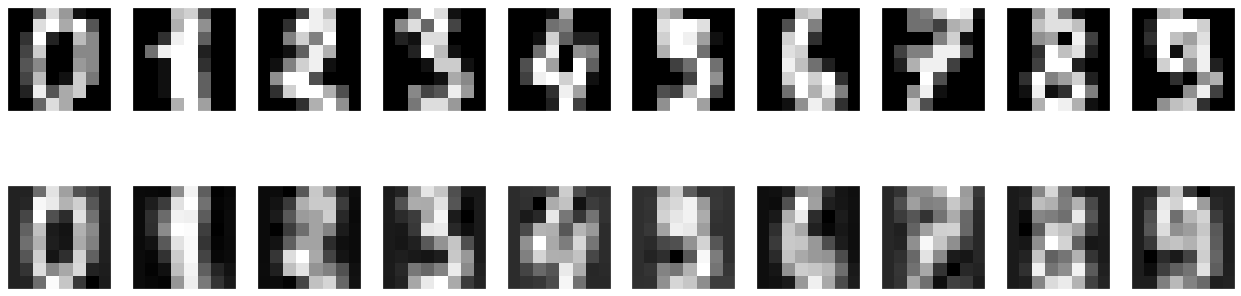

0.8493974642542453


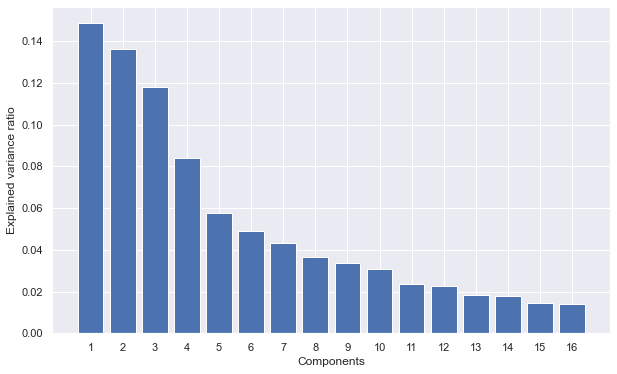

In [ ]:
# Hacemos un PCA
pca = PCA(n_components=16, random_state=1000)
digits_pca = pca.fit_transform(X)


# Show some sample digits
fig, ax = plt.subplots(2, 10, figsize=(22, 6))

for i in range(10):
    ax[0, i].imshow(X[i].reshape((8, 8)), cmap='gray')
    ax[0, i].set_xticks([])
    ax[0, i].set_yticks([])

    ax[1, i].imshow(pca.inverse_transform(digits_pca[i]).reshape((8, 8)), cmap='gray')
    ax[1, i].set_xticks([])
    ax[1, i].set_yticks([])

plt.show()

# Total explained variance (as ratio)
print(np.sum(pca.explained_variance_ratio_))

# Show the explained variance ratio per component
ev = pca.explained_variance_ratio_

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(np.arange(1, len(ev) + 1, 1), ev)
ax.set_xticks(np.arange(1, len(ev) + 1, 1))
ax.set_xlabel('Components')
ax.set_ylabel('Explained variance ratio')

plt.show()